In [ ]:
#cc

In [ ]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#reading the data
df = pd.read_csv("/content/drive/MyDrive/sna_project/DDI_dataset.csv",encoding="utf-8")
df.head() 

,Unnamed: 0,drug1_name,drug2_name,weight
0,0,Bivalirudin,Alfuzosin,1
1,1,Bivalirudin,Acemetacin,1
2,2,Bivalirudin,Apixaban,1
3,3,Bivalirudin,Dabigatran etexilate,1
4,4,Bivalirudin,Edoxaban,1


In [ ]:
#df1 = df.head()

In [ ]:
interactions = df[['drug1_name', 'drug2_name', 'weight']]  

In [ ]:
G=nx.Graph(name='Drug Drug Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

In [ ]:
nx.info(G)

"Graph named 'Drug Drug Interaction Graph' with 1868 nodes and 222271 edges"

In [ ]:
nx.average_degree_connectivity(G)

{1: 168.06896551724137,
 2: 321.06451612903226,
 3: 299.5833333333333,
 4: 275.5,
 5: 256.13684210526316,
 6: 381.6923076923077,
 7: 467.5238095238095,
 8: 422.7890625,
 9: 397.5733333333333,
 10: 395.45,
 11: 470.1454545454545,
 12: 297.8682795698925,
 13: 377.15384615384613,
 14: 431.07142857142856,
 15: 385.87333333333333,
 16: 346.6125,
 17: 424.21176470588233,
 18: 400.85185185185185,
 19: 303.05526315789473,
 20: 321.4,
 21: 312.72222222222223,
 22: 406.6515151515151,
 23: 395.49068322981367,
 24: 327.5416666666667,
 25: 433.128,
 26: 444.22115384615387,
 27: 310.1507936507937,
 28: 313.4325396825397,
 29: 268.8448275862069,
 30: 414.50555555555553,
 31: 233.49462365591398,
 32: 391.5,
 33: 416.06526806526807,
 34: 248.25,
 35: 361.51428571428573,
 37: 407.43243243243245,
 38: 428.10526315789474,
 39: 305.48205128205126,
 40: 381.25,
 41: 344.0243902439024,
 42: 431.35714285714283,
 43: 320.9767441860465,
 44: 237.27272727272728,
 45: 444.94444444444446,
 46: 310.1565217391304,
 

<Figure size 1296x1008 with 0 Axes>

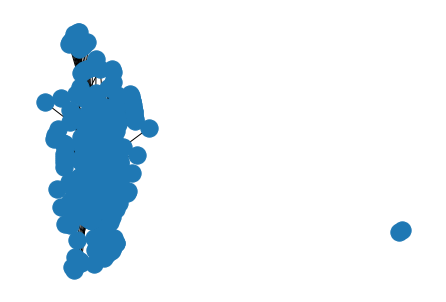

<Figure size 1296x1008 with 0 Axes>

In [ ]:
nx.draw_spring(G)
plt.figure(figsize=(18,14))

In [ ]:
nx.degree(G)

DegreeView({'Bivalirudin': 225, 'Alfuzosin': 403, 'Acemetacin': 399, 'Apixaban': 351, 'Dabigatran etexilate': 433, 'Edoxaban': 406, 'Rivaroxaban': 297, 'Lovastatin': 734, 'Vorapaxar': 104, 'Midazolam': 434, 'Simvastatin': 402, 'Tipranavir': 494, 'Cabergoline': 511, 'Bromocriptine': 651, 'Dihydroergotamine': 810, 'Ergotamine': 545, 'Ergonovine': 534, 'Methylergometrine': 393, 'Triazolam': 397, 'Ethinyl Estradiol': 317, 'Mestranol': 306, 'Estradiol': 373, 'Diethylstilbestrol': 280, 'Cyclosporine': 841, 'Tacrolimus': 430, 'Pethidine': 562, 'Alprazolam': 448, 'Boceprevir': 661, 'Carbamazepine': 917, 'Clarithromycin': 707, 'Delavirdine': 735, 'Estrone': 435, 'Dienestrol': 150, 'Quinestrol': 150, 'Estriol': 162, 'Estradiol acetate': 302, 'Estradiol cypionate': 352, 'Estradiol valerate': 352, 'Bazedoxifene': 156, 'Omacetaxine mepesuccinate': 112, 'Nefazodone': 986, 'Testosterone cypionate': 279, 'Testosterone enanthate': 278, 'Allylestrenol': 107, 'Etonogestrel': 169, 'Medroxyprogesterone ace

(array([643., 339., 264., 262., 153.,  88.,  51.,  51.,  10.,   7.]),
 array([1.000e+00, 1.037e+02, 2.064e+02, 3.091e+02, 4.118e+02, 5.145e+02,
        6.172e+02, 7.199e+02, 8.226e+02, 9.253e+02, 1.028e+03]),
 <a list of 10 Patch objects>)

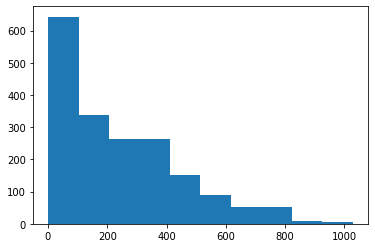

In [ ]:
plt.hist([v for k, v in nx.degree(G)])
#most of them have between 0 and 40 neighbors

(array([643., 339., 264., 262., 153.,  88.,  51.,  51.,  10.,   7.]),
 array([5.35618640e-04, 5.55436529e-02, 1.10551687e-01, 1.65559721e-01,
        2.20567756e-01, 2.75575790e-01, 3.30583824e-01, 3.85591859e-01,
        4.40599893e-01, 4.95607927e-01, 5.50615961e-01]),
 <a list of 10 Patch objects>)

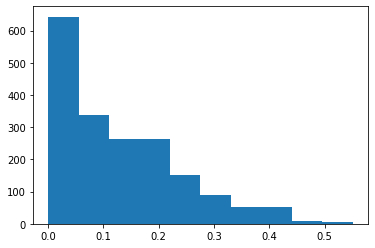

In [ ]:
plt.hist(nx.centrality.degree_centrality(G).values())

(array([1.745e+03, 7.200e+01, 2.800e+01, 1.100e+01, 9.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.00213649, 0.00427298, 0.00640946, 0.00854595,
        0.01068244, 0.01281893, 0.01495541, 0.0170919 , 0.01922839,
        0.02136488]),
 <a list of 10 Patch objects>)

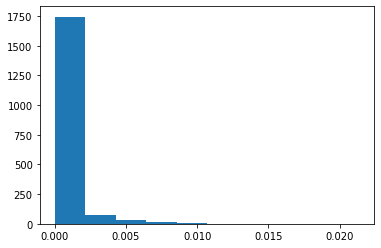

In [ ]:
plt.hist(nx.centrality.betweenness_centrality(G).values())
#degree_centrality

(array([  2.,   0.,   0.,   1.,  75., 203., 382., 875., 273.,  57.]),
 array([5.35618640e-04, 6.75689182e-02, 1.34602218e-01, 2.01635517e-01,
        2.68668817e-01, 3.35702117e-01, 4.02735416e-01, 4.69768716e-01,
        5.36802015e-01, 6.03835315e-01, 6.70868615e-01]),
 <a list of 10 Patch objects>)

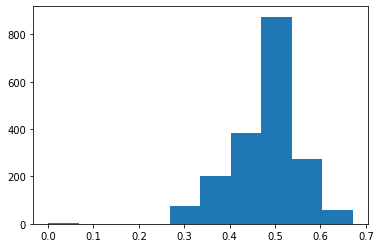

In [ ]:
plt.hist(nx.centrality.closeness_centrality(G).values())

In [ ]:
#nx.diameter(G)#furthest distance

In [ ]:
nx.cluster.average_clustering(G)

0.5376971313828911

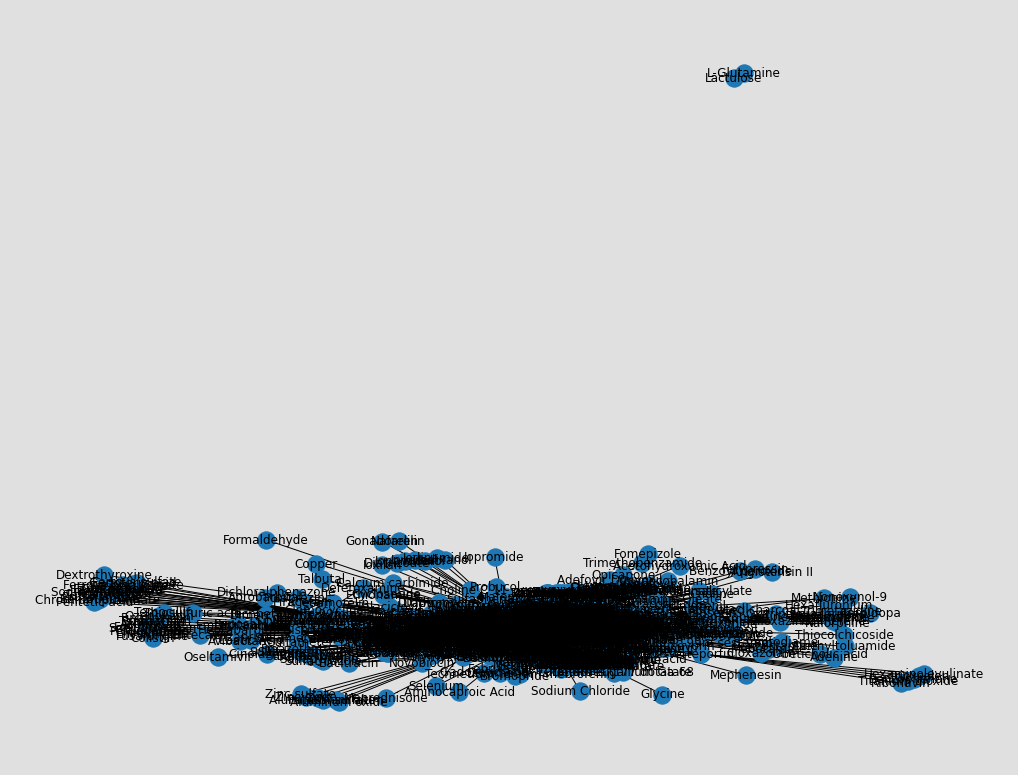

In [ ]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(18,14),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [ ]:
# create an undirected unweighted graph g based on that dataframe
#import community as community_louvain
#import networkx as nx
import community.community_louvain

In [ ]:
#g = nx.read_edgelist('/content/drive/MyDrive/sna_project/df_db_int_sm.csv', create_using=nx.Graph(), nodetype=int)
#g = nx.from_pandas_edgelist(df,edge_key="source", edge_attr=['Source', 'Destination'],create_using=nx.MultiGraph())
partition = community.community_louvain.best_partition(G)

In [ ]:
len(partition)

1868

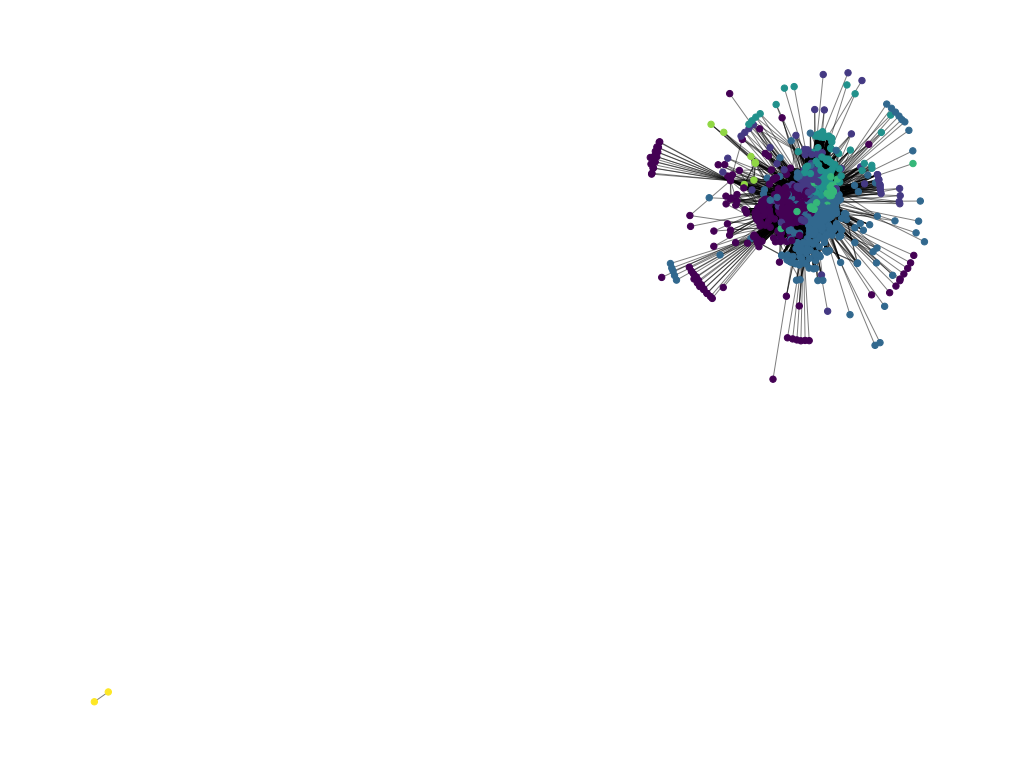

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(18,14))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
# Find the communities
from networkx.algorithms.community import greedy_modularity_communities
communities = sorted(greedy_modularity_communities(G),
key=len, reverse=True)
# Count the communities
len(communities)

5

In [ ]:
def set_node_community(G, communities):
 '''Add community to node attributes'''
 for c, v_c in enumerate(communities):
  for v in v_c:
    # Add 1 to save 0 for external edges
    G.nodes[v]['community'] = c + 1


In [ ]:
def set_edge_community(G):
 '''Find internal edges and add their community to their attributes'''
 for v, w, in G.edges:
  if G.nodes[v]['community'] == G.nodes[w]['community']:
    # Internal edge, mark with community
    G.edges[v, w]['community'] = G.nodes[v]['community']
  else:
    # External edge, mark as 0
    G.edges[v, w]['community'] = 0


In [ ]:
def get_color(i, r_off=1, g_off=1, b_off=1):
 r0, g0, b0 = 0, 0, 0
 n = 16
 low, high = 0.1, 0.9
 span = high - low
 r = low + span * (((i + r_off) * 3) % n) / (n - 1)
 g = low + span * (((i + g_off) * 5) % n) / (n - 1)
 b = low + span * (((i + b_off) * 7) % n) / (n - 1)
 return (r, g, b)


In [ ]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)
# Set community color for nodes
node_color = [
 get_color(G.nodes[v]['community'])
 for v in G.nodes]
# Set community color for internal edges
external = [
 (v, w) for v, w in G.edges
 if G.edges[v, w]['community'] == 0]
internal = [
 (v, w) for v, w in G.edges
 if G.edges[v, w]['community'] > 0]
internal_color = [
 get_color(G.edges[e]['community'])
 for e in internal]

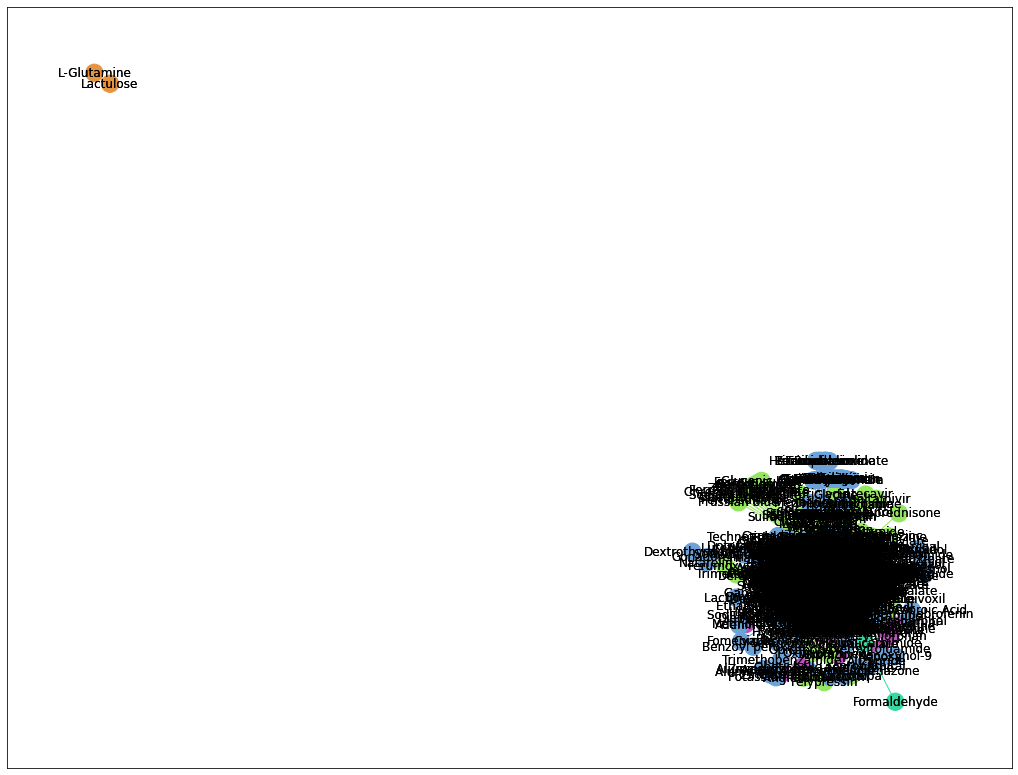

In [ ]:
drug_pos = nx.spring_layout(G)
plt.figure(figsize=(18,14))
# Draw external edges
nx.draw_networkx(
 G, pos=drug_pos, node_size=0,
 edgelist=external, edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
 G, pos=drug_pos, node_color=node_color,
 edgelist=internal, edge_color=internal_color)
